In [1]:
%matplotlib inline
from fileoperations.fileoperations import get_filenames_in_dir
from collections import Counter
from matplotlib import pyplot
from sklearn import linear_model
import numpy as np
import os
import itertools


In [2]:
### %matplotlib inline
# parameters
distribution_types = ['pd']
step_sizes = [7.5, 15.0, 25.0, 50.0, 100.0]
kernel_widths = [0, 7.5, 15.0, 25.0, 50.0, 100.0]
model_types = ['single']

# experimental setup
experiment_types = ['tonic']
fold_idx = np.arange(0,10,1)

# testing parameters
dis_measures = ['l1', 'l2', 'l3', 'bhat', 'dis_intersect', 'dis_corr']
k_neighbors = [1, 3, 5, 10, 15]
min_peak_ratios = [0.15]
ranks = [5]


tcombs = itertools.product(step_sizes, kernel_widths, distribution_types, model_types, 
                           fold_idx, experiment_types, dis_measures, k_neighbors, min_peak_ratios, ranks)
# eliminate cases with kernel_width less than one third of step_size
# eliminate cases where single model_type is not called with 1 nearest neighbor
tcombs = itertools.ifilter(lambda c: (c[1] == 0 or 3 * c[1] >= c[0]) and
                           (c[3] == 'multi' or c[7] == 1), tcombs)
tcombs = list(tcombs)
num_it = len(tcombs)

finished = 0
for tc in tcombs:
    tstr = '--'.join([tc[3], tc[2], str(tc[0]).replace('.', '_'), 
                      str(tc[1]).replace('.', '_'), tc[6], str(tc[7]), 
                      str(tc[8]).replace('.', '_')])
    tfile = os.path.join('./data/testing/tonic/', tstr, 'fold' + str(tc[4]), 'results.json')
    finished += os.path.exists(tfile)    

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()

ini_tt = os.times()[4]
tt = np.array([0])
ff = np.array([finished])


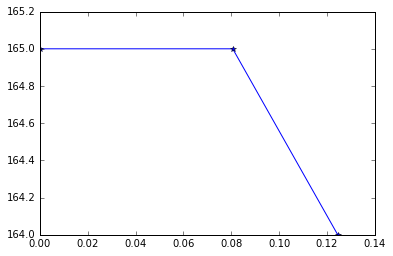

1276 experiments are complete
164 experiments are remaining
11.872959 experiments per hour
The total operation time is estimated as 13.937431 hours
The remaining operation time is estimated as 13.812900 hours


In [7]:
tt = np.vstack((tt,(os.times()[4] - ini_tt) / 3600.0))
finished = 0
for tc in tcombs:
    tstr = '--'.join([tc[3], tc[2], str(tc[0]).replace('.', '_'), 
                      str(tc[1]).replace('.', '_'), tc[6], str(tc[7]), 
                      str(tc[8]).replace('.', '_')])
    tfile = os.path.join('./data/testing/tonic/', tstr, 'fold' + str(tc[4]), 'results.json')
    finished += os.path.exists(tfile)  

ff = np.vstack((ff, finished))
rem_ff = num_it - ff

regr.fit(num_it -ff, tt)

pyplot.plot(tt, rem_ff, '-*')
pyplot.show()

num_file_per_hour = - 1.0 / regr.coef_
est_hours = (regr.predict(0) - tt[0])
rem_hours = est_hours - tt[-1]
print "%d experiments are complete" % ff[-1]
print "%d experiments are remaining" % rem_ff[-1]
print "%f experiments per hour" % num_file_per_hour
print "The total operation time is estimated as %f hours" % est_hours
print "The remaining operation time is estimated as %f hours" % rem_hours
